In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.model import Plant_Model


In [ ]:
TRAIN_FOLDER = "../dataset/train"
TEST_FOLDER = "../dataset/test"

BATCH_SIZE = 32
IMAGE_SIZE = (224,224)

# this extracts the images from the dataset folder
train_ds = tf.keras.utils.image_dataset_from_directory(TRAIN_FOLDER,
                                                      shuffle=True,
                                                      validation_split=0.2,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      seed=123,
                                                      subset="training")
val_ds = tf.keras.utils.image_dataset_from_directory(TRAIN_FOLDER,
                                                     shuffle=True,
                                                     validation_split=0.2,
                                                     seed=123,
                                                     subset="validation",
                                                     batch_size=BATCH_SIZE,
                                                     image_size=IMAGE_SIZE
                                                     )
test_ds = tf.keras.utils.image_dataset_from_directory(TEST_FOLDER,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      label_mode=None)

class_names = train_ds.class_names
print(class_names)


Found 72543 files belonging to 40 classes.
Using 58035 files for training.
Found 72543 files belonging to 40 classes.
Using 14508 files for validation.
Found 5408 files.
['Apple_Apple_scab', 'Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple_healthy', 'Bell_pepper_healthy', 'Bell_pepper_spot', 'Blueberry_healthy', 'Cherry_healthy', 'Cherry_powdery_mildew', 'Corn_(maize)_gray_leaf_spot', 'Corn_(maize)_healthy', 'Corn_(maize)_northern_leaf_blight', 'Corn_(maize)_rust', 'Grape_black_rot', 'Grape_blight', 'Grape_esca', 'Grape_healthy', 'Orange_Haunglongbing', 'Peach_bacterial_spot', 'Peach_healthy', 'Pepper_bell_bacterial_spot', 'Pepper_healthy', 'Potato_early_blight', 'Potato_healthy', 'Potato_late_blight', 'Rasberry_healthy', 'Soyabean_healthy', 'Squash__powdery_mildew', 'Strawberry_healthy', 'Strawberry_scorch', 'Tomato_bacterial_spot', 'Tomato_early_blight', 'Tomato_healthy', 'Tomato_late_blight', 'Tomato_mold', 'Tomato_mosaic_virus', 'Tomato_septoria_spot', 'Tomato_spider_mites_two_s

In [ ]:

# this is to train the model by importing the 
model = Plant_Model()
model_v = model.build_model()
model_v.summary()
history = model_v.fit(train_ds,epochs=1,validation_data=val_ds)
model_v.save('Plant.keras')



Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_81 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_82 (Sequential)      │ (None, 40)             │     2,775,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,832,040 (10.80 MB)

 Trainable params: 2,832,040 (10.80 MB)

 Non-trainable params: 0 (0.00 B)

1814/1814 ━━━━━━━━━━━━━━━━━━━━ 4743s 3s/step - accuracy: 0.5164 - loss: 1.6845 - val_accuracy: 0.6840 - val_loss: 1.0395


In [ ]:
load_model = tf.keras.models.load_model('Plant.keras')   
load_model.summary()
load_model.predict()

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_81 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_82 (Sequential)      │ (None, 40)             │     2,775,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,496,122 (32.41 MB)

 Trainable params: 2,832,040 (10.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,664,082 (21.61 MB)

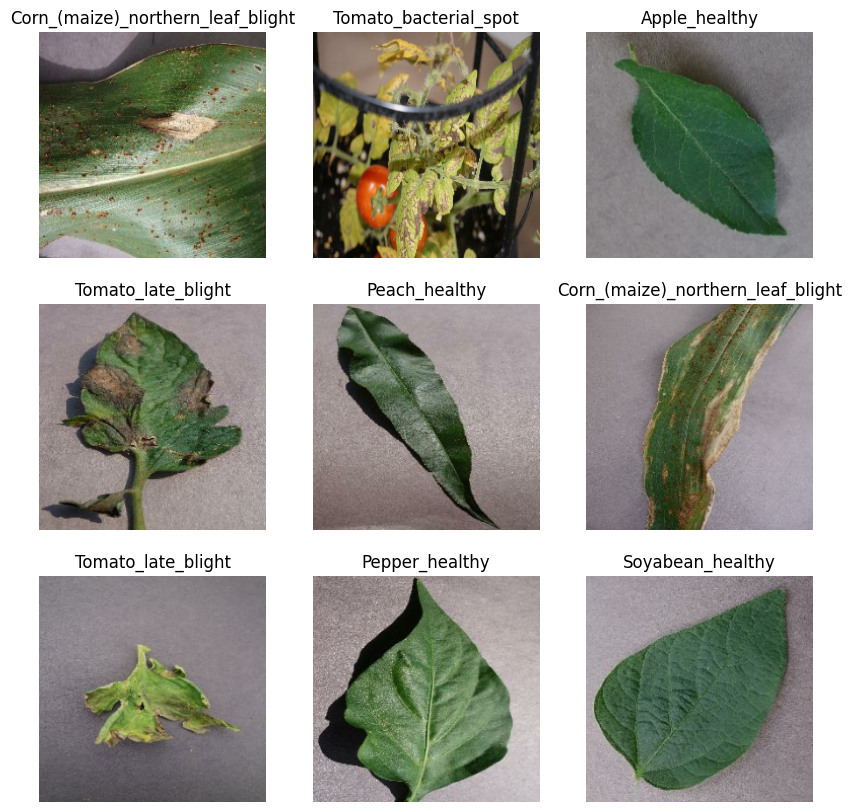

In [79]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")